# Mid Bootcamp Classification Project
## Attempt 2 - making some features categorical

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing CSV

In [5]:
df = pd.read_excel('creditcardmarketing.xlsx')

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [7]:
df['Offer Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

### Normalising column header names

In [8]:
df.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer-type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance']

In [9]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer-type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

### next

In [10]:
df.head()

,customer_number,offer_accepted,reward,mailer-type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_number        18000 non-null  int64  
 1   offer_accepted         18000 non-null  object 
 2   reward                 18000 non-null  object 
 3   mailer-type            18000 non-null  object 
 4   income_level           18000 non-null  object 
 5   no_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection   18000 non-null  object 
 7   credit_rating          18000 non-null  object 
 8   no_credit_cards_held   18000 non-null  int64  
 9   no_homes_owned         18000 non-null  int64  
 10  household_size         18000 non-null  int64  
 11  own_your_home          18000 non-null  object 
 12  average_balance        17976 non-null  float64
 13  q1_balance             17976 non-null  float64
 14  q2_balance             17976 non-null  float64
 15  q3

### Filling nulls with average

In [12]:
df['average_balance'] = df['average_balance'].fillna(df['average_balance'].mean())
df['q1_balance'] = df['q1_balance'].fillna(df['q1_balance'].mean())
df['q2_balance'] = df['q2_balance'].fillna(df['q2_balance'].mean())
df['q3_balance'] = df['q3_balance'].fillna(df['q3_balance'].mean())
df['q4_balance'] = df['q4_balance'].fillna(df['q4_balance'].mean())

### Looking for multicolinearity

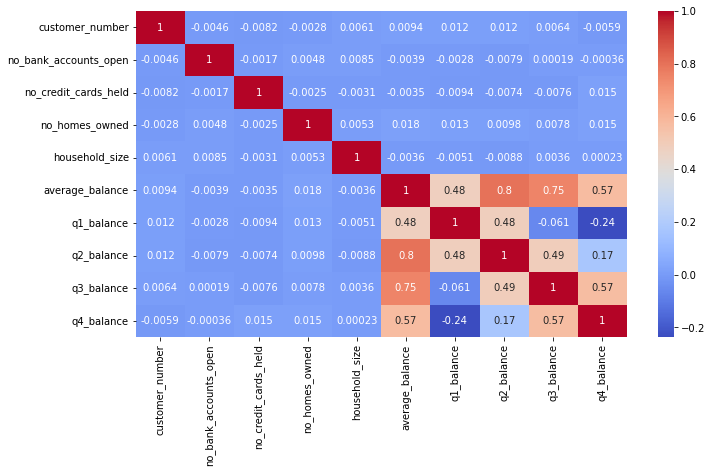

In [13]:
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm');

### Dropping customer_number

In [14]:
df.drop('customer_number', axis=1, inplace=True)

### Looking at chi-squared

In [15]:
from scipy.stats import chi2_contingency

In [16]:
contingency= pd.crosstab(df['credit_rating'], df['offer_accepted']) 

<AxesSubplot:xlabel='offer_accepted', ylabel='credit_rating'>

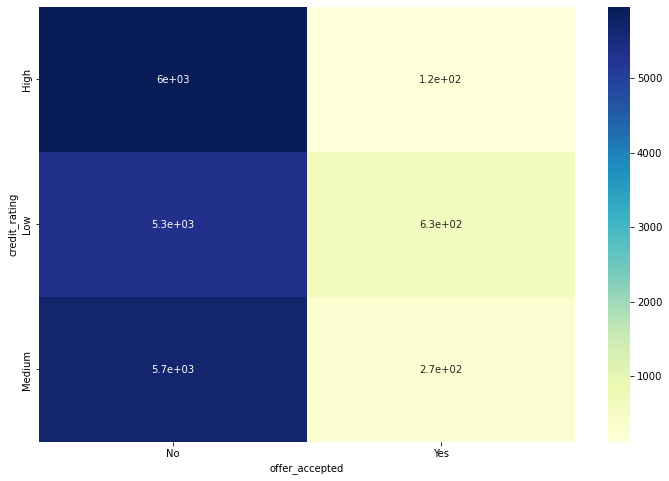

In [17]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [18]:
for x in df.select_dtypes(include='object').columns:
    contingency= pd.crosstab(df[x], df['offer_accepted'])
    print('chi_squared p-value of',x, 'is', chi2_contingency(contingency, correction=False)[0])

chi_squared p-value of offer_accepted is 18000.0
chi_squared p-value of reward is 101.99764699462307
chi_squared p-value of mailer-type is 171.13002056177373
chi_squared p-value of income_level is 114.36759816901265
chi_squared p-value of overdraft_protection is 0.1443392833541908
chi_squared p-value of credit_rating is 443.1289291631659
chi_squared p-value of own_your_home is 0.0016758285818582156


## Changing some columns to categorical

In [19]:
#no_bank_accounts_open, no_credit_cards_held, no_homes_owned, household_size

In [20]:
df['no_bank_accounts_open'] = df['no_bank_accounts_open'].astype('object')
df['no_credit_cards_held'] = df['no_credit_cards_held'].astype('object')
df['no_homes_owned'] = df['no_homes_owned'].astype('object')
df['household_size'] = df['household_size'].astype('object')

### More EDA

In [21]:
#sns.pairplot(df, kind='scatter', hue='offer_accepted')

## Modelling

### Splitting in numerical and categorical

In [22]:
df.columns

Index(['offer_accepted', 'reward', 'mailer-type', 'income_level',
       'no_bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'no_credit_cards_held', 'no_homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [23]:
X = df.select_dtypes(include=np. number)
cat = df.select_dtypes(include=object)
cat.drop('offer_accepted', axis=1, inplace=True)
y = df['offer_accepted']

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Looking for outliers

In [24]:
# consider whether to deal with outliers

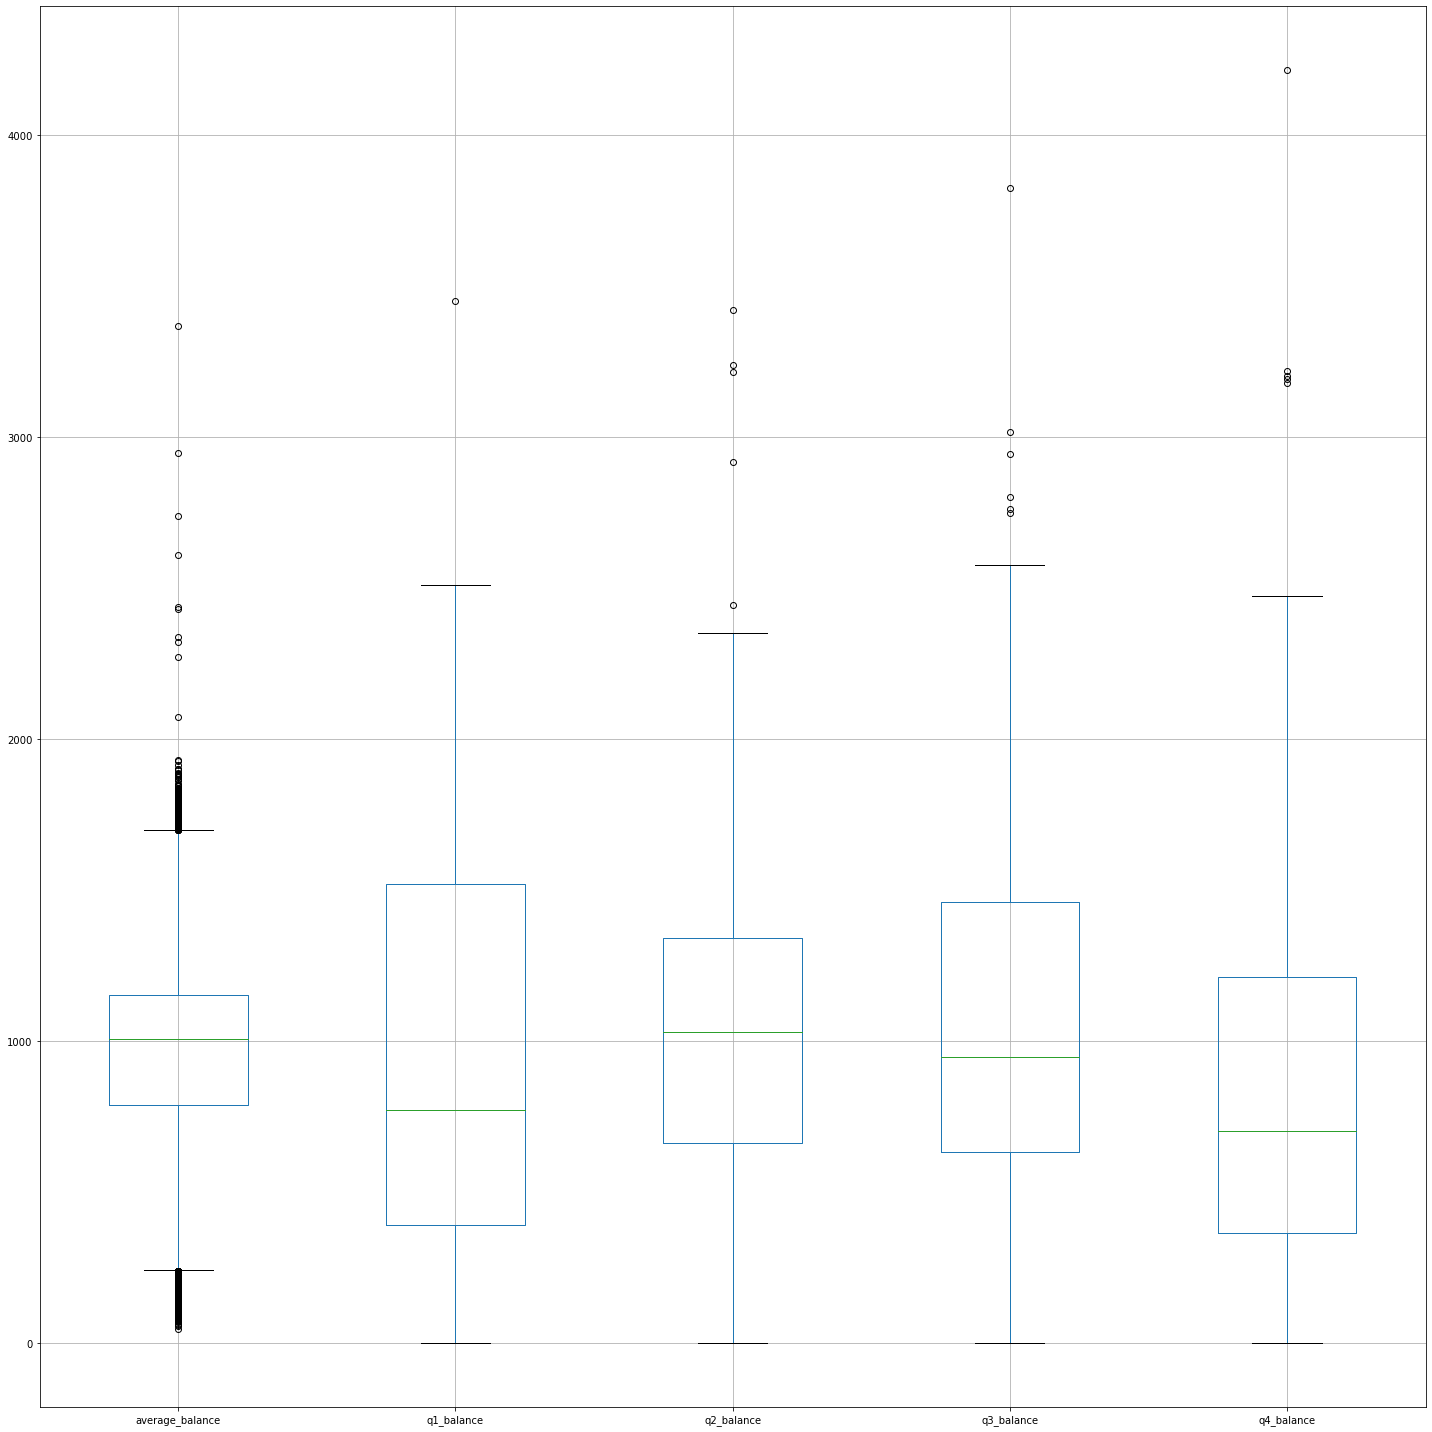

In [25]:
plt.figure(figsize=(20, 20))
X.boxplot()
plt.tight_layout()

### scaling numerical data

In [26]:
#sns.pairplot(X)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x = pd.DataFrame(x_scaled, columns = X.columns)

In [29]:
#sns.pairplot(x)

### Getting dummies for categorical data

In [30]:
categorical = pd.get_dummies(cat, drop_first=True)

In [31]:
categorical

,reward_Cash Back,reward_Points,mailer-type_Postcard,income_level_Low,income_level_Medium,no_bank_accounts_open_2,no_bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,...,no_homes_owned_2,no_homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
17996,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
17997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
17998,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


### Concatenating data

In [32]:
x_full = pd.concat([x, categorical], axis=1)

## Model Candidate 1

### Imports

In [33]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.6, random_state=40)

In [35]:
lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred =lr.predict(X_test)

In [36]:
y_train.value_counts()

No     6808
Yes     392
Name: offer_accepted, dtype: int64

In [37]:
accuracy_score(y_pred, y_test)

0.9415740740740741

In [38]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.941574,0.0,0.941574,0.470787,0.886562
recall,1.000000,0.0,0.941574,0.500000,0.941574
f1-score,0.969908,0.0,0.941574,0.484954,0.913240
support,10169.000000,631.0,0.941574,10800.000000,10800.000000


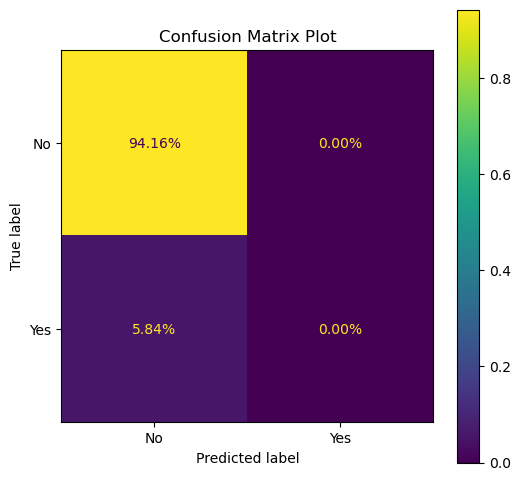

In [39]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 2
### Using SMOTE to fix imbalance in data

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [44]:
#recreate X and y
x_full_sm, y_sm = smote.fit_resample(x_full, y)
y_sm.value_counts()

No     16977
Yes    16977
Name: offer_accepted, dtype: int64

#### Test & Train

In [46]:
#redo train test split it2
X_train_sm, X_test_sm, y_train_sm, y_test_sm =train_test_split(x_full_sm, y_sm, test_size= 0.6, random_state=40)

In [47]:
len(X_train_sm), len(y_train_sm)

(13581, 13581)

In [48]:
y_train_sm.value_counts()

No     6826
Yes    6755
Name: offer_accepted, dtype: int64

In [49]:
lr = LogisticRegression(max_iter=400, solver='lbfgs', multi_class='ovr').fit(X_train_sm, y_train_sm)
y_pred_sm =lr.predict(X_test_sm)

In [50]:
accuracy_score(y_test_sm ,y_pred_sm)

0.7689589162126343

In [52]:
pd.DataFrame(classification_report(y_test_sm, y_pred_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.767597,0.770317,0.768959,0.768957,0.768962
recall,0.769185,0.768734,0.768959,0.768960,0.768959
f1-score,0.768390,0.769525,0.768959,0.768958,0.768960
support,10151.000000,10222.000000,0.768959,20373.000000,20373.000000


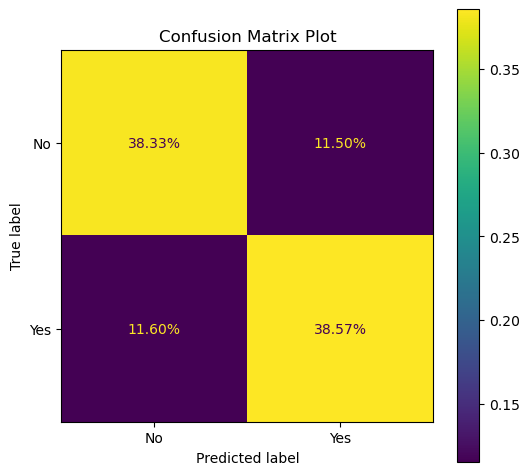

In [56]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test_sm, y_test_sm, ax=ax, normalize='all', values_format='.2%');

## TOMEK LINKS 3
### Using Tomek Links to undersample

In [ ]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [ ]:
y_train_tk.value_counts()

No     11563
Yes      738
Name: offer_accepted, dtype: int64

In [ ]:
lr.fit(X_train_tk, y_train_tk)
y_pred_tk = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_tk)

0.9472222222222222

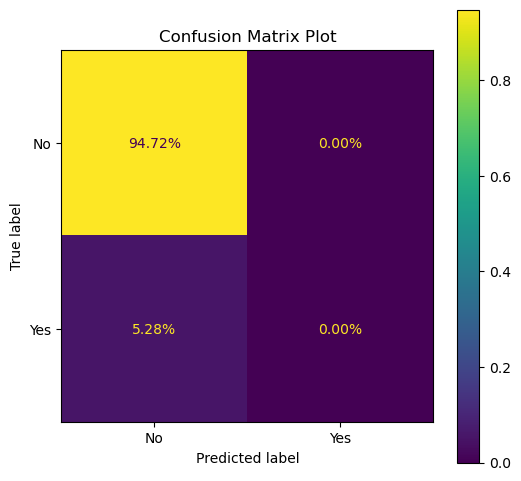

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 4
### Using Smote and Tomek together

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [ ]:
y_train_tk.value_counts()

No     11563
Yes      738
Name: offer_accepted, dtype: int64

In [ ]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [ ]:
y_train_tk_sm.value_counts()

Yes    11563
No     11563
Name: offer_accepted, dtype: int64

In [ ]:
lr = LogisticRegression(max_iter=400).fit(X_train_tk_sm, y_train_tk_sm)
y_pred_tk_sm = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_tk_sm)

0.7588888888888888

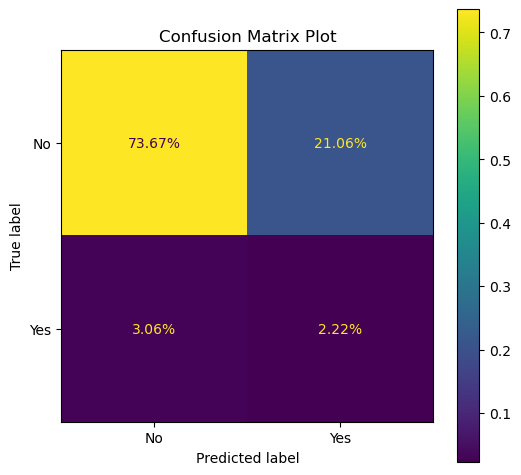

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 5
### K Nearest Neighbours - with smote + tomek

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_kn)


0.7018518518518518

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959371,0.082019,0.701852,0.520695,0.913066
recall,0.715543,0.456140,0.701852,0.585841,0.701852
f1-score,0.819709,0.139037,0.701852,0.479373,0.783785
support,5115.000000,285.000000,0.701852,5400.000000,5400.000000


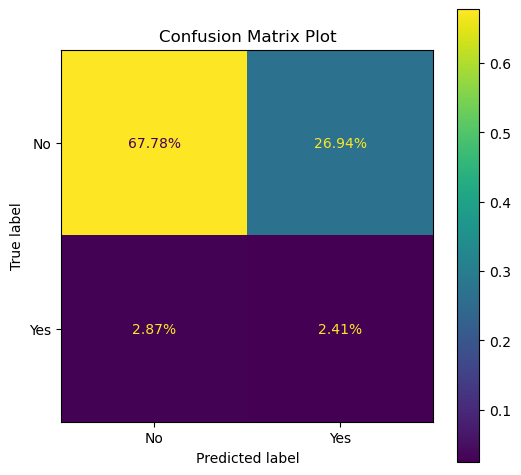

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Candidate Model 6
### Random Forest - with smote + tomek

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=10)

rf.fit(X_train_tk_sm,y_train_tk_sm)

y_pred_rf=rf.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_rf)

0.8966666666666666

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.951994,0.119777,0.896667,0.535885,0.908071
recall,0.938221,0.150877,0.896667,0.544549,0.896667
f1-score,0.945057,0.133540,0.896667,0.539299,0.902227
support,5115.000000,285.000000,0.896667,5400.000000,5400.000000


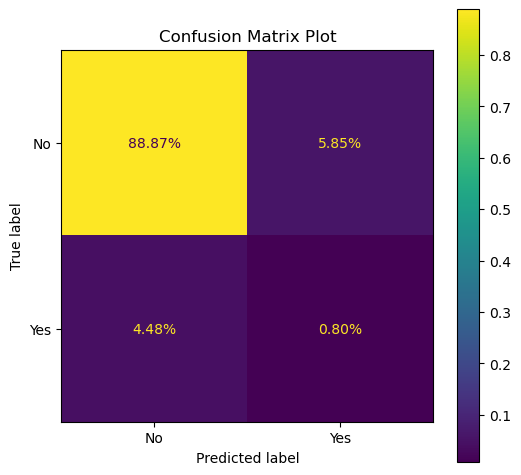

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Candidate Model 7
### Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
tr = tree.DecisionTreeClassifier().fit(X_train_tk_sm, y_train_tk_sm)

In [ ]:
y_pred_tr = tr.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_kn)


0.6968518518518518

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.958597,0.079602,0.696852,0.519100,0.912206
recall,0.710655,0.449123,0.696852,0.579889,0.696852
f1-score,0.816212,0.135235,0.696852,0.475724,0.780272
support,5115.000000,285.000000,0.696852,5400.000000,5400.000000


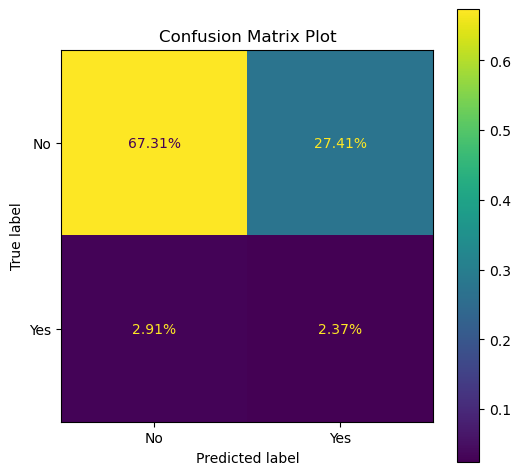

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Candidate Model 
### dropping average_balance
### with n_nearest neighbours

In [ ]:
x_full_2 = x_full.drop(['q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full_2, y, test_size=0.3, random_state=100)

In [ ]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [ ]:
y_train_tk.value_counts()

No     11525
Yes      738
Name: offer_accepted, dtype: int64

In [ ]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_kn)


0.7285185185185186

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.955101,0.075485,0.728519,0.515293,0.908677
recall,0.748583,0.368421,0.728519,0.558502,0.728519
f1-score,0.839325,0.125298,0.728519,0.482312,0.801640
support,5115.000000,285.000000,0.728519,5400.000000,5400.000000


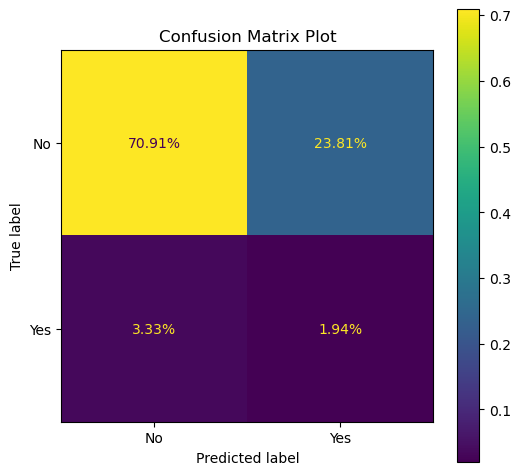

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');